# Quality check
Review fields extracted from cards with LayoutParser and compare to scans using `file_name`

Issues:
- [ ] new line character in read-out
- [ ] special characters misinterpreted by OCR
- [ ] typos incorrectly interpreted by OCR
- [ ] missing letters where bounding box cut off


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
df = pd.read_csv('/nfs/turbo/isr-jtalexnonsen/extracts/flat_images_all.csv')
df.info() # data types are all string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25738 entries, 0 to 25737
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  25738 non-null  object
 1   AGENCY     25622 non-null  object
 2   AMOUNT     23537 non-null  object
 3   ID         25438 non-null  object
 4   LOCATION   24431 non-null  object
 5   NAME       25551 non-null  object
 6   OTHER      291 non-null    object
 7   STATUS     25552 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [3]:
df.shape # rows, columns

(25738, 8)

In [4]:
df.index.values # each row is a card with an index position

array([    0,     1,     2, ..., 25735, 25736, 25737])

In [5]:
df.nunique() # count of unique values in each column

file_name    25738
AGENCY       18523
AMOUNT        3154
ID           18888
LOCATION      6414
NAME         25509
OTHER          251
STATUS        2467
dtype: int64

In [6]:
df.isnull().sum() # total null values in each column

file_name        0
AGENCY         116
AMOUNT        2201
ID             300
LOCATION      1307
NAME           187
OTHER        25447
STATUS         186
dtype: int64

Compare sample card extracts to scans

In [7]:
df_sample = df.sample(n=5) # review a random sample of records
df_sample

,file_name,AGENCY,AMOUNT,ID,LOCATION,NAME,OTHER,STATUS
12663,783095-11-0595.jpg,Detroit Agency\n\nCitizens Mortgage Corporatio...,"$8,500.\n",CC-~196\n,"Detroit, Mich.\n","Klecha, Joseph J. & Irene\n",NaN,(VA)\nFIRST MORTGAGE LOAN GUARANTEED\n
23118,783095-21-0017.jpg,"Houston Agency\n\nMortgage & Trust, Inc.,\nHou...","$5,500.\n",C0574\n,"Houston, Texas\n","Trojan, Fred & Mary fF.\n",NaN,(VA)\nFIRST MORTGAGE LOAN GUARANTEED\n
5906,783095-05-1091.jpg,"Atlanta Agency\n\nSpratlin, Harrington & Thoma...","$10,000.\n",CC~1044\n,"Cobb County, Ga.\n","Dickson, Jaci\n",NaN,(VA)\nFIRST MORTGAGE LOAN GUARANTEED\n
1938,783095-02-0716.jpg,San Antonio Agency - Agent's Serial No. PC 375...,"#6 ,000.\n",LH-14233\n,San Antonio » Texas\n,"Bletsch, George H. & Dorothy M.\n",NaN,(VA)\nFIRST MORTGAGE LOAN GUARANTEED\n
17213,783095-15-0372.jpg,"Nashville Agency\n\nNashville Trust Company,\n...","$5,100.\n",CC-337\n,"Nashville, Tenn.\n","Osborne, Richard M. & Kathleen Elliott\n",NaN,——\n\n(VA)\nFIRST MORTGAGE LOAN GUARANTEED\n


783095-11-0595.jpg
Detroit Agency

Citizens Mortgage Corporation,
Detroit, Mich.

$8,500.

CC-~196

Detroit, Mich.

Klecha, Joseph J. & Irene

nan
(VA)
FIRST MORTGAGE LOAN GUARANTEED



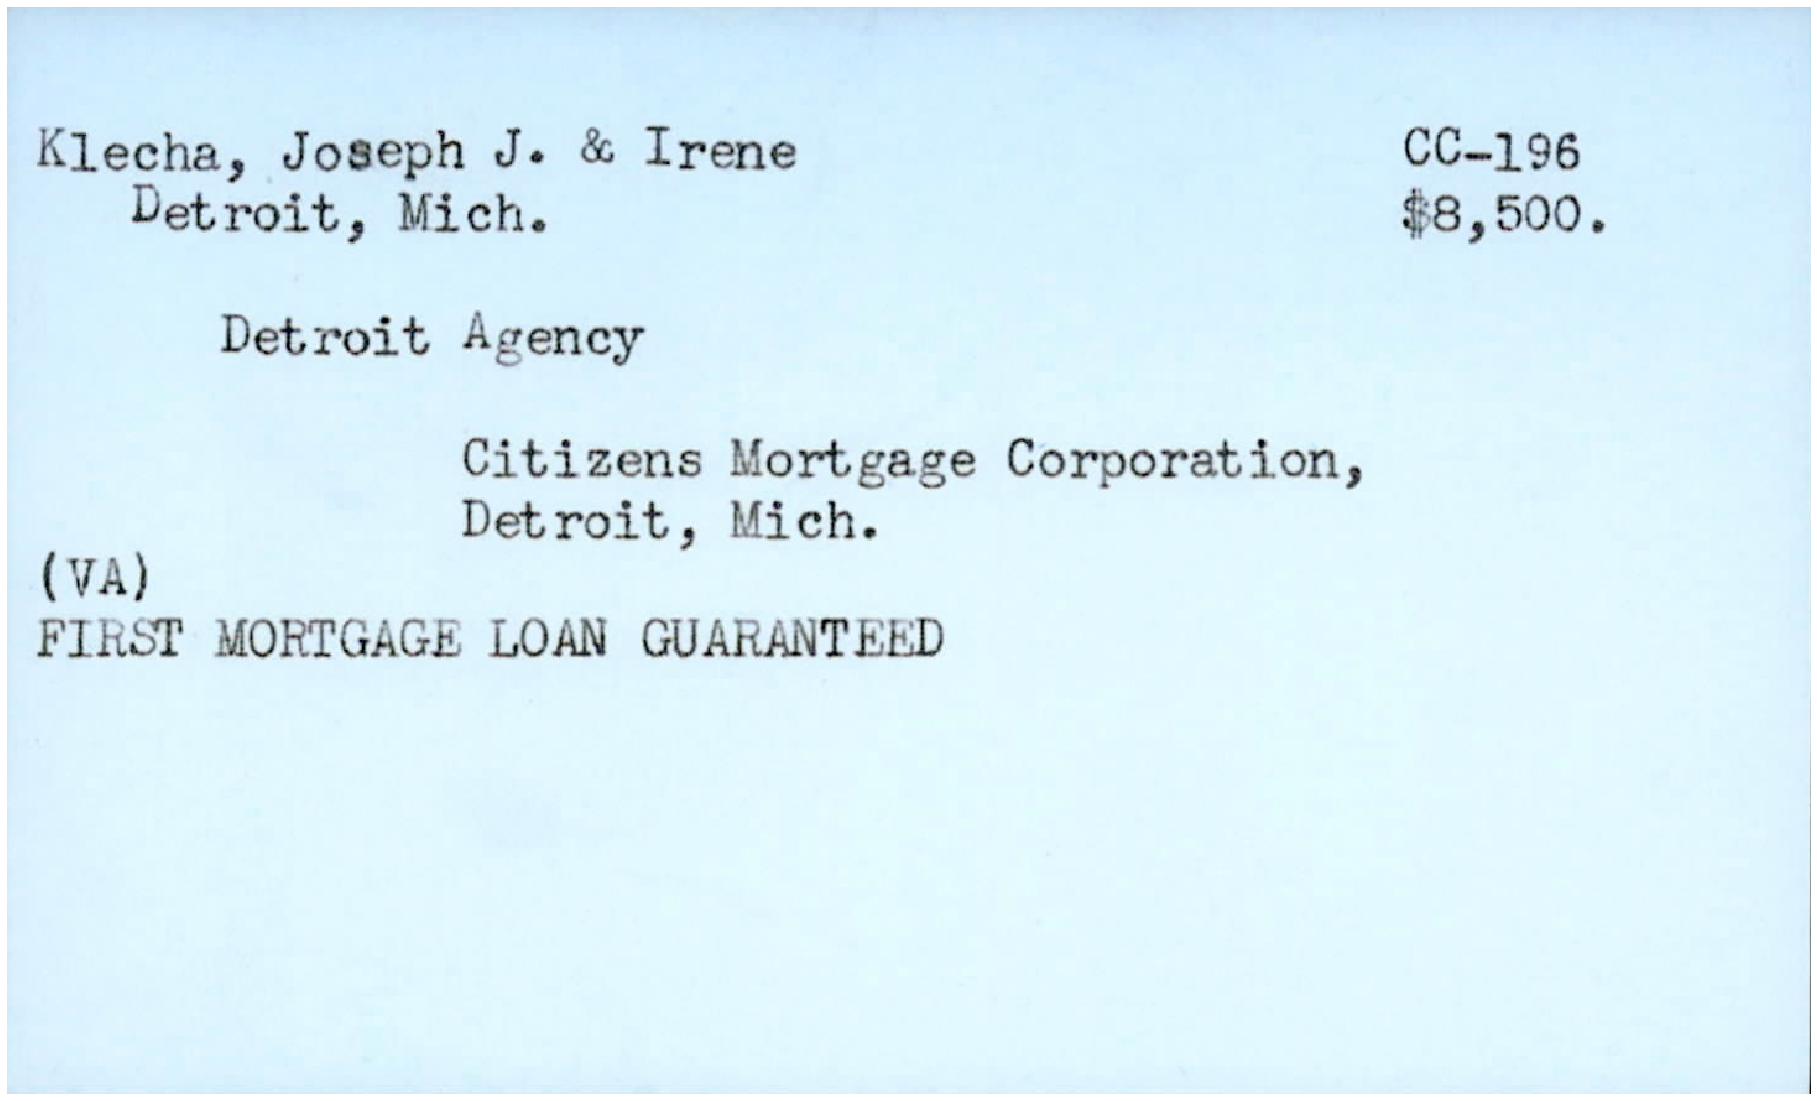

In [8]:
sample_paths = []

for index, row in df_sample.iterrows():
    sample_path = '/nfs/turbo/isr-jtalexnonsen/images/flat_images/'+ row["file_name"]
    sample_paths.append(sample_path)

selector = 0 # edit selector

for row in df_sample.iloc[selector]:
    print(row)

labeled_image = cv2.imread(sample_paths[selector])
plt.figure(figsize = (40,20))
plt.axis('off')
plt.imshow(labeled_image, interpolation='nearest');
plt.show()
